Calculating price predictions on data using XGBoostRegressor

In [1]:
import pandas as pd

import numpy as np

In [2]:

US_predictions = pd.read_csv('/Users/baytech11/Desktop/Agnes/Springboard/Capstone_3/US_data.csv')



In [3]:
US_predictions.head(3)

,piece_count,min_age,max_age,avg_age,price_per_piece,theme_name_Angry Birds™,theme_name_Architecture,theme_name_BOOST,theme_name_BrickHeadz,theme_name_Classic,...,theme_name_Minifigures,theme_name_NEXO KNIGHTS™,theme_name_NINJAGO®,theme_name_Pteranodon Chase,theme_name_Speed Champions,theme_name_Star Wars™,theme_name_Stygimoloch Breakout,theme_name_THE LEGO® BATMAN MOVIE,theme_name_THE LEGO® NINJAGO® MOVIE™,theme_name_Technic
0,277.0,6.0,12.0,9.0,0.108267,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,168.0,6.0,12.0,9.0,0.118988,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,74.0,6.0,12.0,9.0,0.175541,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import xgboost as xg

In [5]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [6]:
X= US_predictions.drop("price_per_piece", axis=1).values

y = US_predictions['price_per_piece'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 50)

In [8]:
xgb = XGBRegressor()


In [9]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [10]:
xgb.score(X_test, y_test)

0.6849538529379714

In [11]:
xgb_predict = xgb.predict(X_test[0:10])

In [12]:
xgb_predict

array([0.08722374, 0.09548547, 0.10236032, 0.10591035, 0.08836535,
       0.07158746, 0.07115805, 0.10931567, 0.07778173, 0.10589676],
      dtype=float32)

In [13]:
print('Predicted US and CA Price per Piece:')
print(('Min'),np.min(xgb_predict))
print(('Max'), np.max(xgb_predict))
print(('Median'), np.median(xgb_predict))
print(('Mean'), np.mean(xgb_predict))

Predicted US and CA Price per Piece:
Min 0.07115805
Max 0.10931567
Median 0.09192541
Mean 0.09150849


In [14]:
predictions = pd.DataFrame(X_test[0:10], columns = [US_predictions.drop("price_per_piece", axis=1)])

In [15]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 36 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   (piece_count,)                                       10 non-null     float64
 1   (min_age,)                                           10 non-null     float64
 2   (max_age,)                                           10 non-null     float64
 3   (avg_age,)                                           10 non-null     float64
 4   (theme_name_Angry Birds™,)                           10 non-null     float64
 5   (theme_name_Architecture,)                           10 non-null     float64
 6   (theme_name_BOOST,)                                  10 non-null     float64
 7   (theme_name_BrickHeadz,)                             10 non-null     float64
 8   (theme_name_Classic,)                                10 non-null     floa

In [16]:
pd.set_option('display.max_columns', None)
predictions.head(10)

,piece_count,min_age,max_age,avg_age,theme_name_Angry Birds™,theme_name_Architecture,theme_name_BOOST,theme_name_BrickHeadz,theme_name_Classic,theme_name_Creator 3-in-1,theme_name_Creator Expert,theme_name_DC Comics™ Super Heroes,theme_name_DC Super Hero Girls,theme_name_DIMENSIONS™,theme_name_Dilophosaurus Outpost Attack,theme_name_Disney™,theme_name_Elves,theme_name_Friends,theme_name_Ghostbusters™,theme_name_Ideas,theme_name_Indoraptor Rampage at Lockwood Estate,theme_name_Juniors,theme_name_Jurassic Park Velociraptor Chase,theme_name_MINDSTORMS®,theme_name_Marvel Super Heroes,theme_name_Minecraft™,theme_name_Minifigures,theme_name_NEXO KNIGHTS™,theme_name_NINJAGO®,theme_name_Pteranodon Chase,theme_name_Speed Champions,theme_name_Star Wars™,theme_name_Stygimoloch Breakout,theme_name_THE LEGO® BATMAN MOVIE,theme_name_THE LEGO® NINJAGO® MOVIE™,theme_name_Technic
0,233.0,7.0,14.0,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,521.0,8.0,14.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,330.0,6.0,12.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,513.0,9.0,16.0,12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,439.0,8.0,14.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,225.0,7.0,12.0,9.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1403.0,9.0,14.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,201.0,7.0,14.0,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,2382.0,16.0,99.0,57.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,308.0,7.0,14.0,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
import matplotlib.pyplot as plt

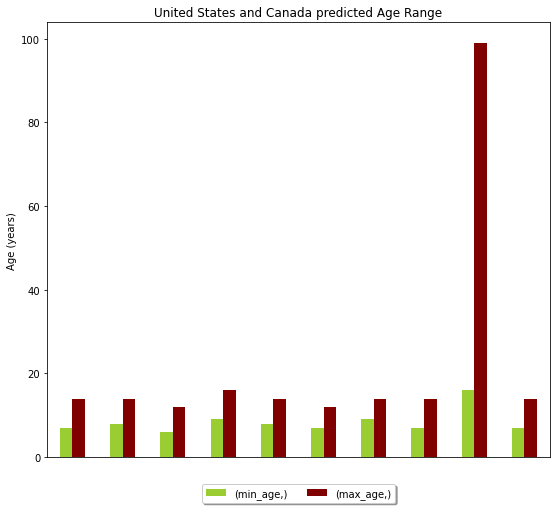

In [18]:

predictions.plot( y=["min_age", "max_age"], kind="bar", figsize=(9, 8), color=['yellowgreen','maroon'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
plt.title('United States and Canada predicted Age Range')
plt.ylabel('Age (years)') 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

Text(0, 0.5, 'Piece Count')

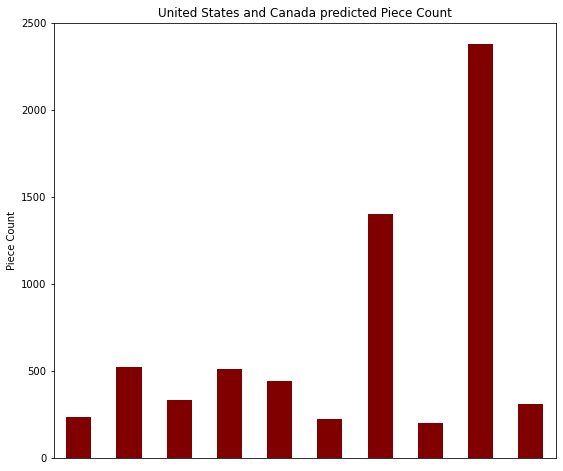

In [19]:

predictions.plot( y='piece_count', kind="bar", figsize=(9, 8), color='maroon', legend=None)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
plt.title('United States and Canada predicted Piece Count')
plt.ylabel('Piece Count') 